In [48]:

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
import pickle
import numpy as np

## Load Dataset

In [2]:
df = pd.read_csv('../data/Telco-Customer-Churn.csv')

## Data Exploration

In [3]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

In [4]:
profile


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [10]:
df.duplicated().sum()

0

In [11]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [12]:
df.shape

(7043, 21)

## Plotting

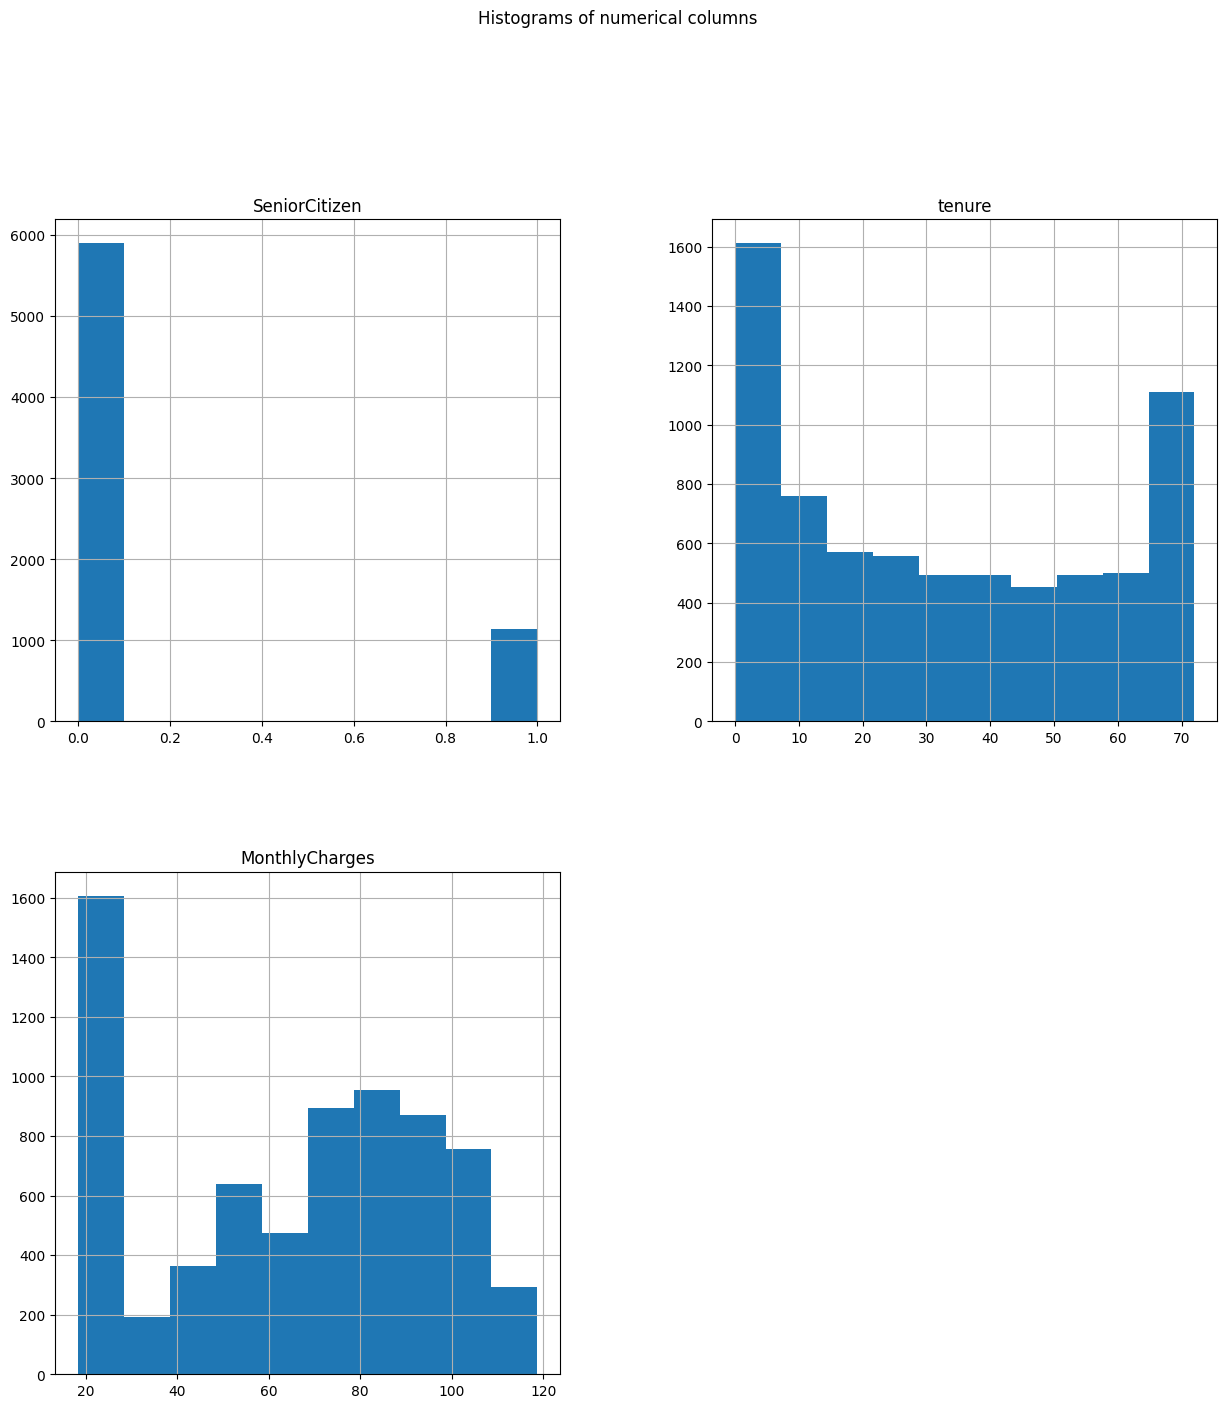

In [13]:
df.drop(['TotalCharges'], axis=1).hist(figsize=(15,15))
plt.suptitle('Histograms of numerical columns', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

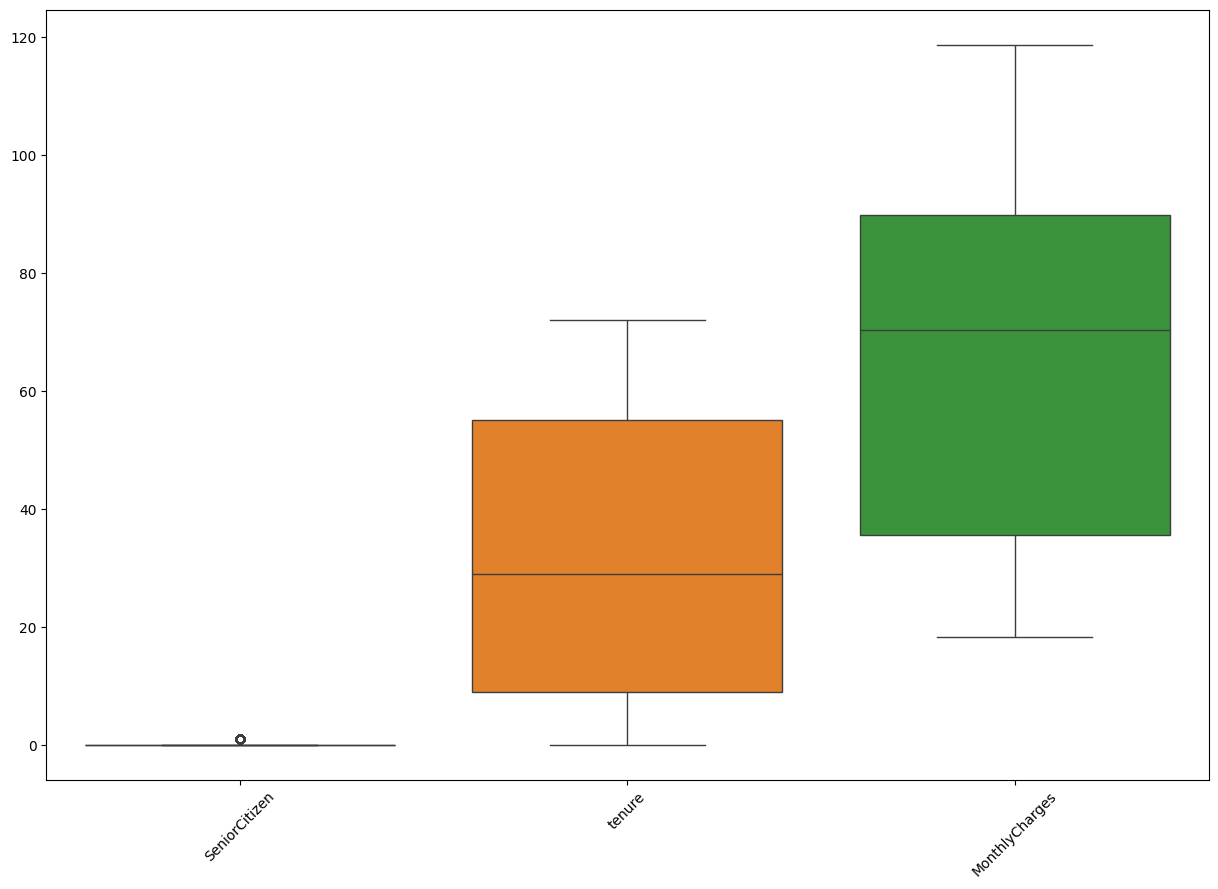

In [14]:
# boxplot of numerical columns
plt.figure(figsize=(15,10))
sns.boxplot(data=df.drop(['TotalCharges'], axis=1))
plt.xticks(rotation=45)
plt.show()

## Data Preprocessing

### Remove unnecessary columns

In [15]:
df.drop(['customerID'], axis=1, inplace=True)

### Change data type

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [17]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [18]:
encoder = LabelEncoder()

# List of columns to encode
columns_to_encode = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Encode the columns
for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])

In [19]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [20]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [22]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.corr()['TotalCharges'].sort_values(ascending=False)

TotalCharges        1.000000
tenure              0.825880
MonthlyCharges      0.651065
MultipleLines       0.453202
Contract            0.450306
StreamingMovies     0.398088
StreamingTV         0.392472
DeviceProtection    0.389066
OnlineBackup        0.375556
Partner             0.319072
TechSupport         0.276890
OnlineSecurity      0.254473
PaperlessBilling    0.157830
PhoneService        0.113008
SeniorCitizen       0.102411
Dependents          0.064653
gender              0.000048
InternetService    -0.175691
Churn              -0.199484
PaymentMethod      -0.330594
Name: TotalCharges, dtype: float64

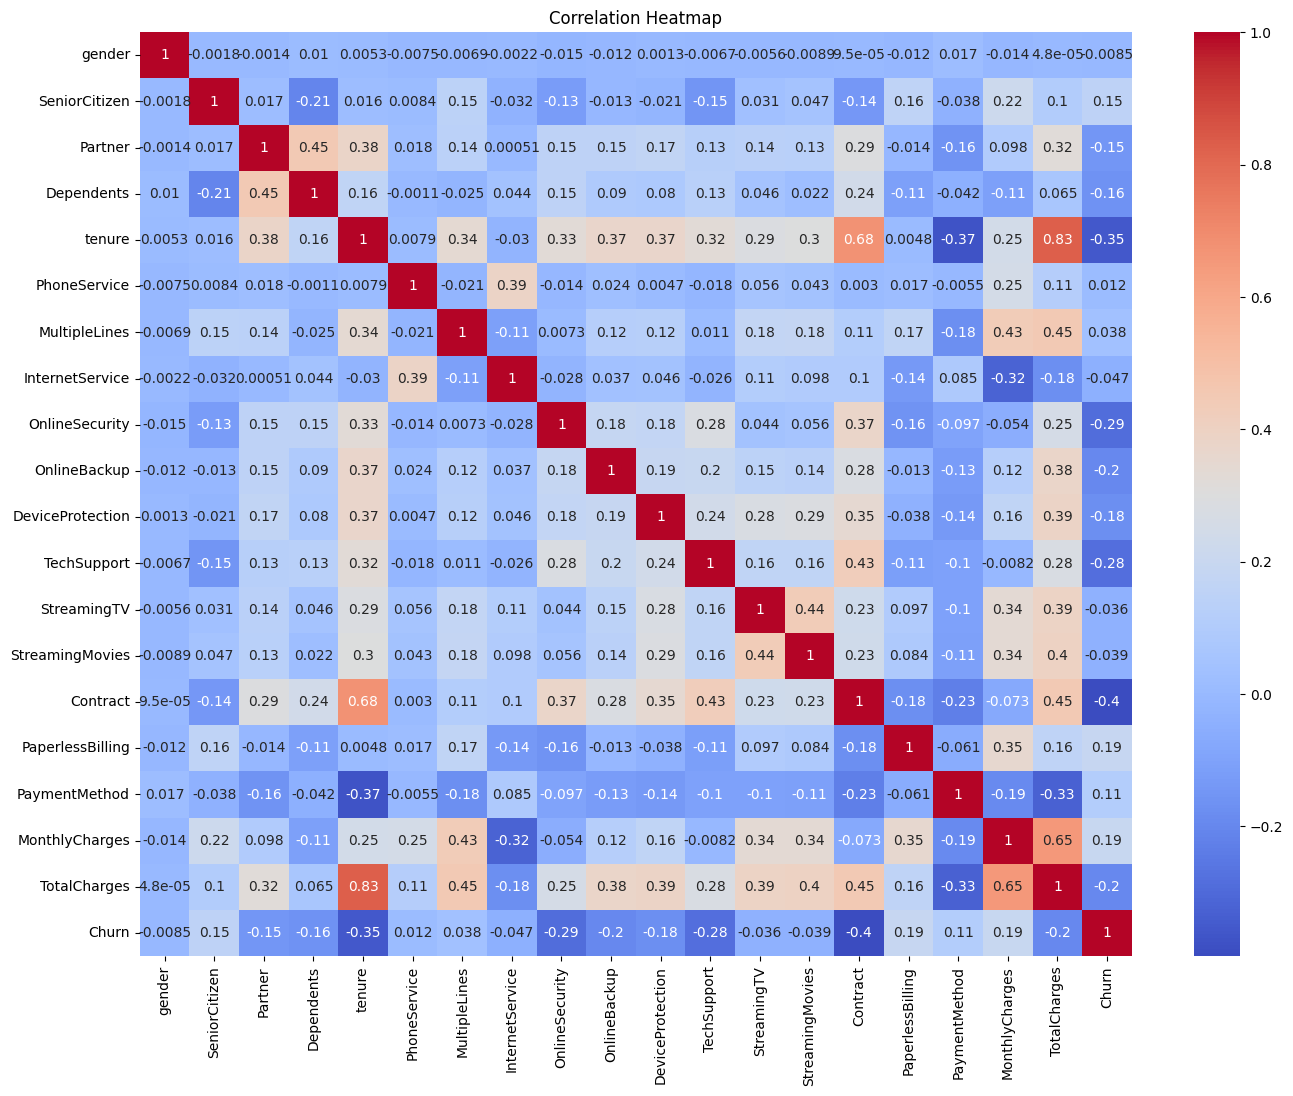

In [25]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

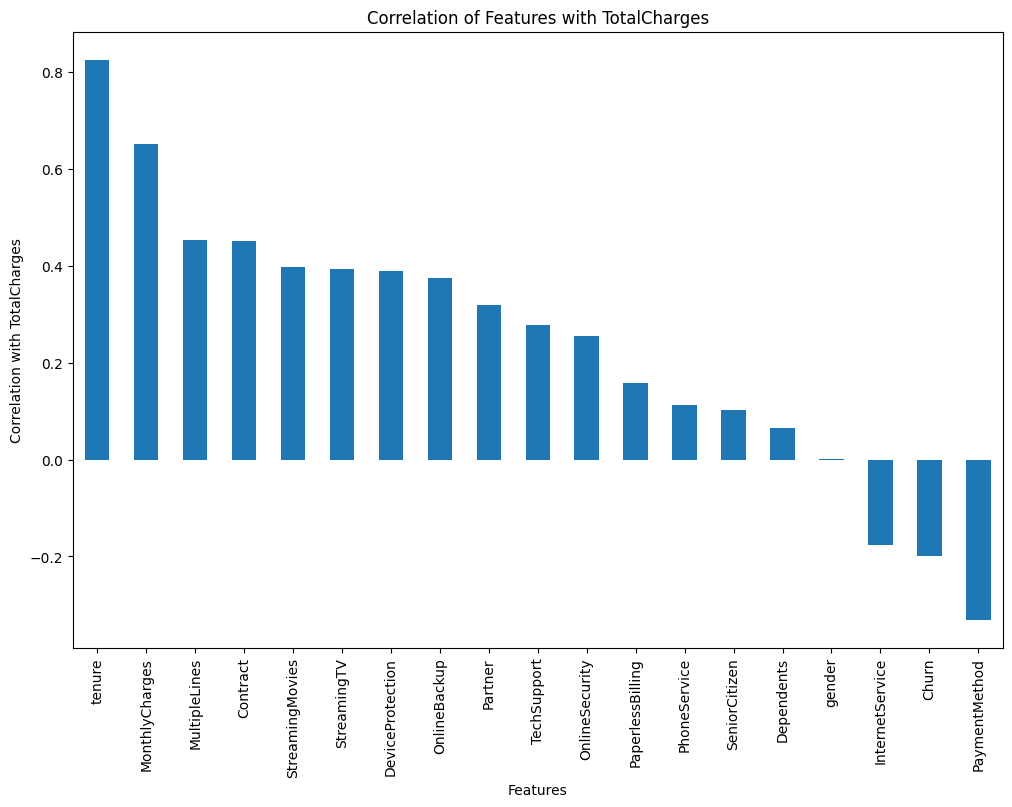

In [26]:
plt.figure(figsize=(12, 8))
df.corr()['TotalCharges'].sort_values(ascending=False).drop('TotalCharges').plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation with TotalCharges')
plt.title('Correlation of Features with TotalCharges')
plt.show()

### we remove columns with correlation less than 0.1 or greater than -0.1

In [27]:
df.drop(['Dependents', 'gender'], axis=1, inplace=True)

In [28]:
df.head()

,SeniorCitizen,Partner,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### check for outliers

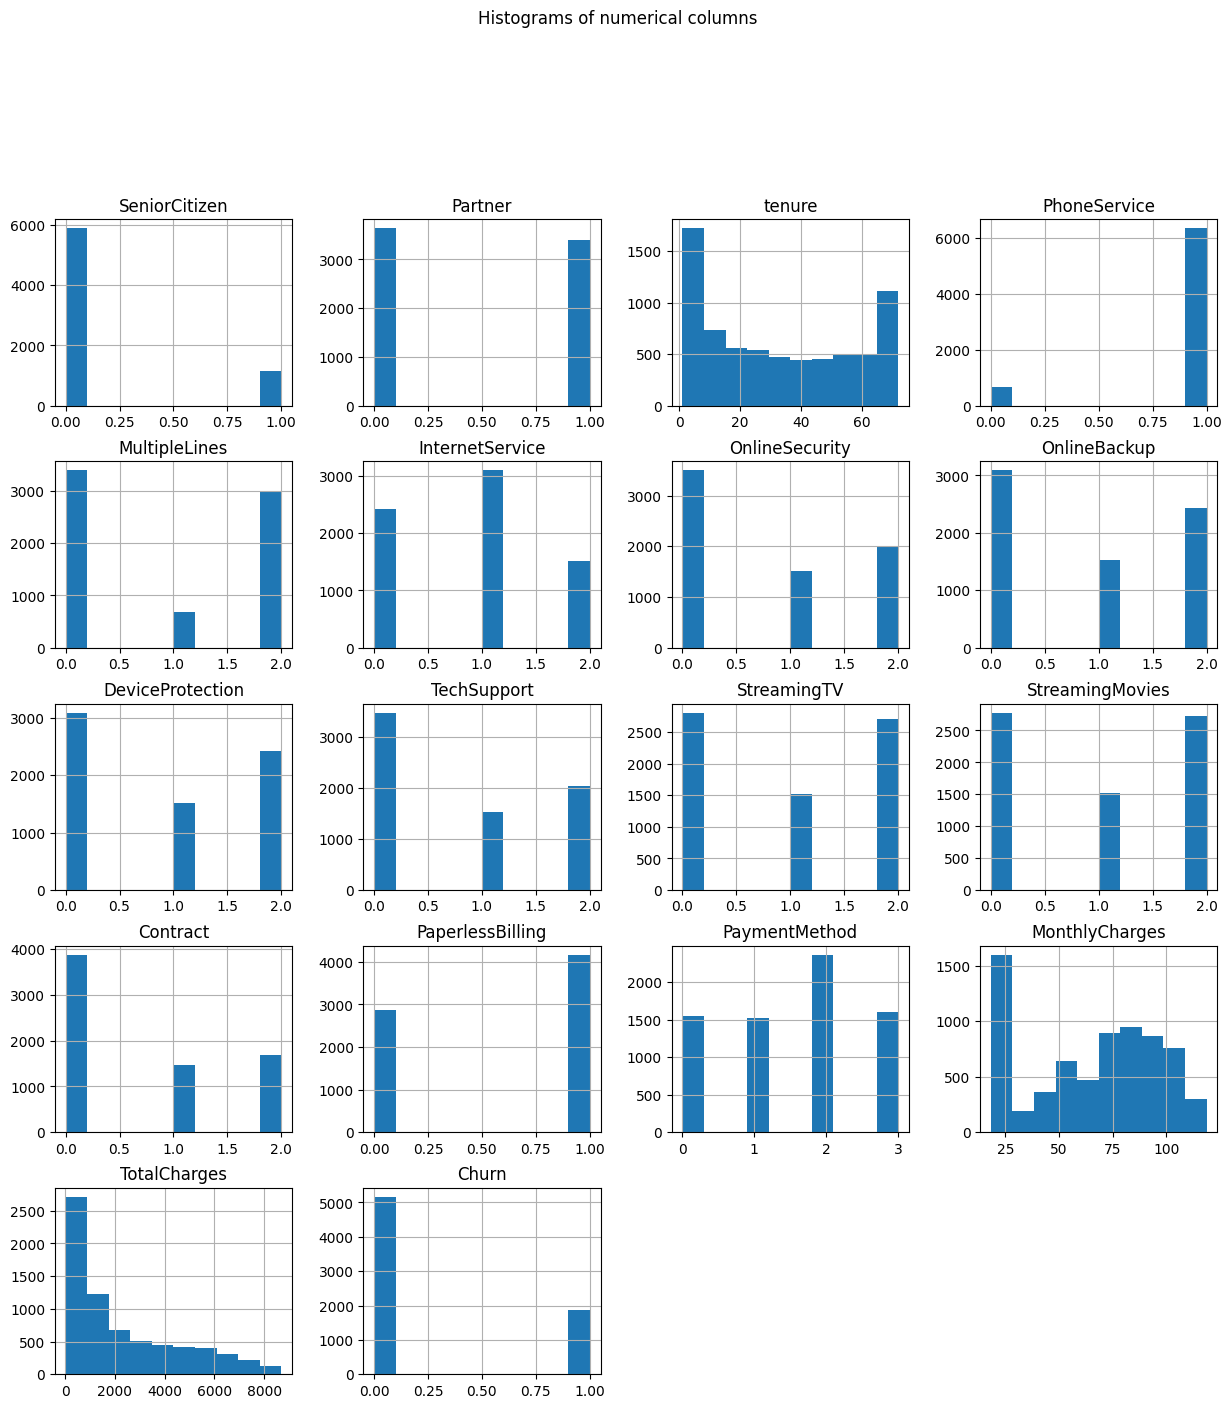

In [29]:
df.hist(figsize=(15,15))
plt.suptitle('Histograms of numerical columns', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

### lets explore outliers

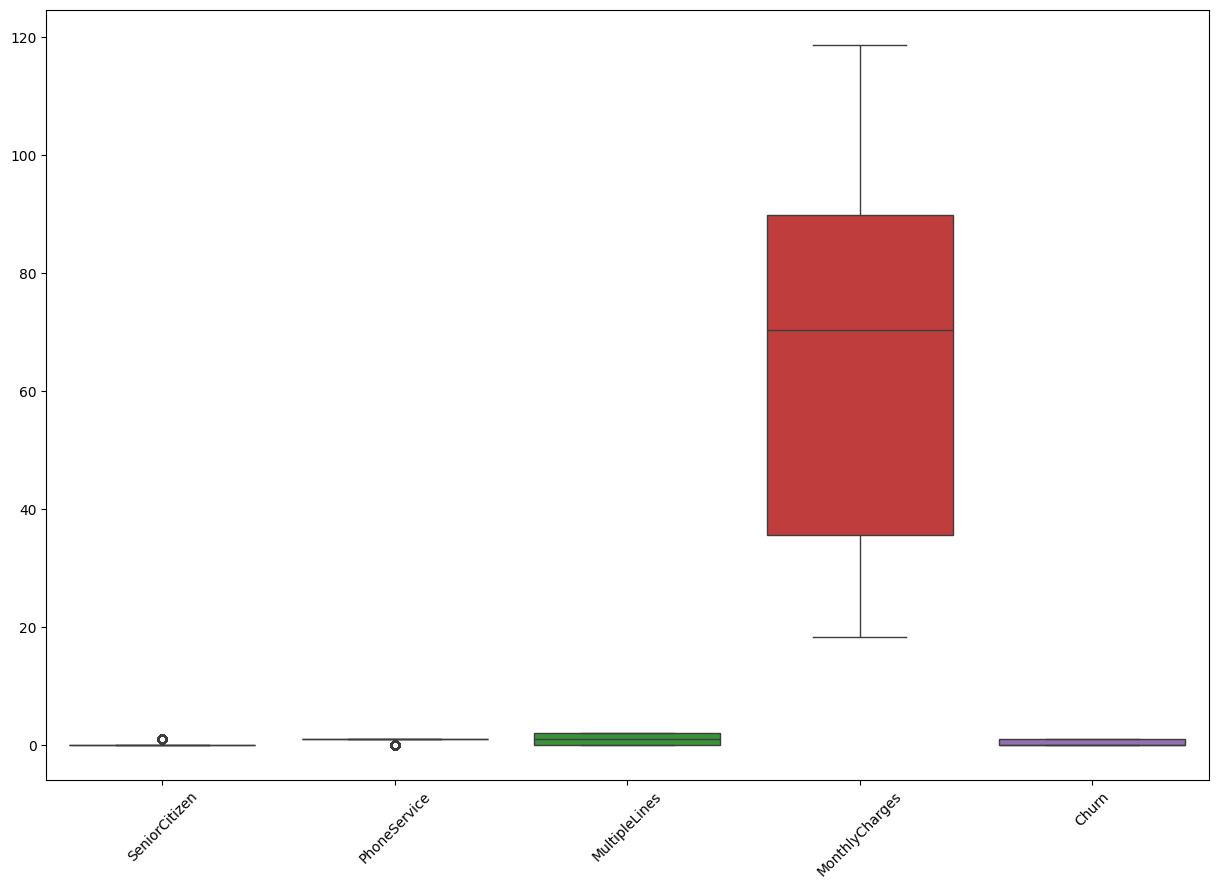

In [30]:
# box plot for SeniorCitizen and PhoneService and MultipleLines and Churn
plt.figure(figsize=(15,10))
sns.boxplot(data=df[['SeniorCitizen', 'PhoneService', 'MultipleLines', 'MonthlyCharges', 'Churn']])
plt.xticks(rotation=45)
plt.show()


In [31]:
df['MonthlyCharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

### select features

In [32]:
X = df.drop(['TotalCharges'], axis=1)
y = df['TotalCharges']

### develop model

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### handle outliers

### Build pipeline

In [34]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

In [35]:
params_grid = {
    'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
    'regressor': [LinearRegression(), GradientBoostingRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), SVR(), KNeighborsRegressor()],
}

In [36]:
grid_search = GridSearchCV(pipeline, params_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/anaskanafani/Desktop/ml/customer-churn/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anaskanafani/Desktop/ml/customer-churn/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaskanafani/Desktop/ml/customer-churn/env/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anaskanafani/Desktop/ml/customer-churn/env/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 376, in _score
    r

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', LinearRegression())]),
             n_jobs=-1,
             param_grid={'regressor': [LinearRegression(),
                                       GradientBoostingRegressor(),
                                       DecisionTreeRegressor(),
                                       RandomForestRegressor(), SVR(),
                                       KNeighborsRegressor()],
                         'scaler': [StandardScaler(), MinMaxScaler(),
                                    RobustScaler()]},
             scoring='accuracy', verbose=1)

### Get the best model

In [37]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_scaler = best_params['scaler']
best_classifier = best_params['regressor']

print(f'Best Parameters: {best_params}')
print(f'Best Score: {best_score}')
print(f'Best Scaler: {best_scaler}')
print(f'Best Regressor: {best_classifier}')

Best Parameters: {'regressor': LinearRegression(), 'scaler': StandardScaler()}
Best Score: nan
Best Scaler: StandardScaler()
Best Regressor: LinearRegression()


In [38]:
best_pipeline = Pipeline([
    ('scaler', best_scaler),
    ('classifier', best_classifier)
])
best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LinearRegression())])

## Model Evaluation

In [39]:
y_pred = best_pipeline.predict(X_test)
accuracy = best_pipeline.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Accuracy: {round(accuracy * 100, 2)}%')
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Accuracy: 91.15%
Mean Squared Error: 457577.88785762683
Mean Absolute Error: 541.6182644264559
R2 Score: 0.9114517314021886


In [ ]:
cv_scores = cross_val_score(best_pipeline, X, y, cv=5, scoring='accuracy')
print(f'Cross-ated accuracy: {cv_scores.mean()}')

### Visualize model performance

In [49]:
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(y_pred)    # initialise a matrix full with zeros
y_pred_classes[y_pred > cutoff] = 1 
y_test_classes = np.zeros_like(y_pred)
y_test_classes[y_test > cutoff] = 1 

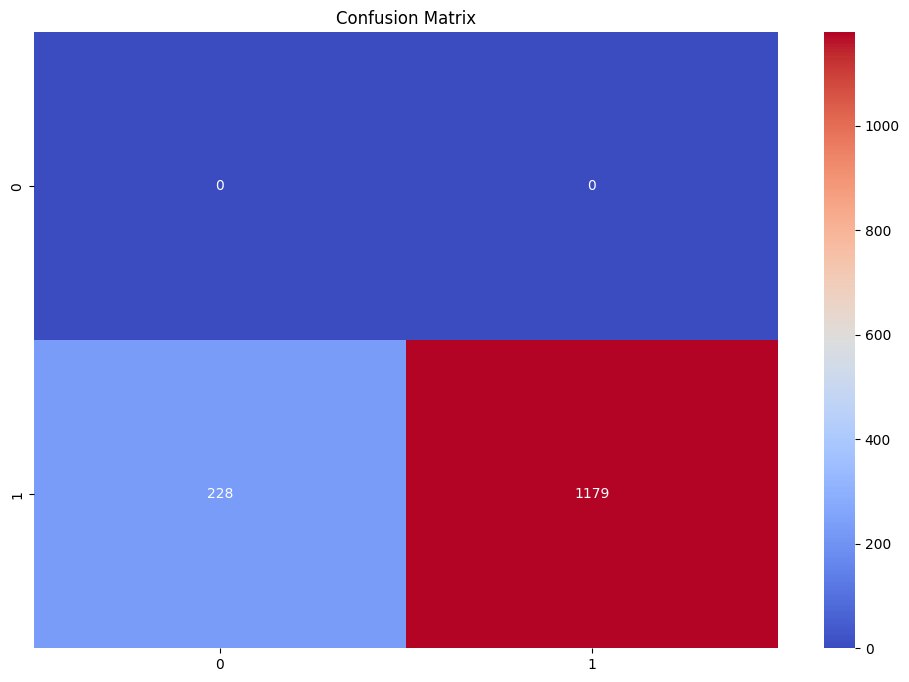

In [51]:
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.title('Confusion Matrix')
plt.show()

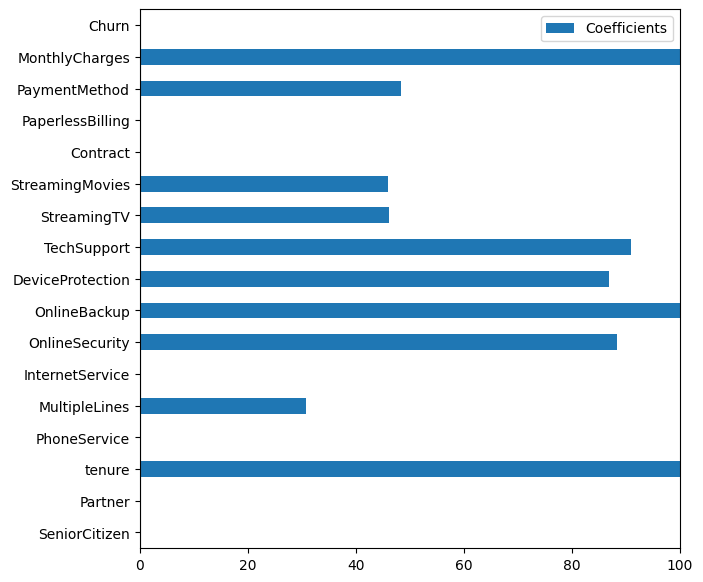

In [56]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame(
    best_classifier.coef_, columns=["Coefficients"], index=X_train.columns
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.axvline(x=0, color=".5")
plt.xlim((0, 100))
plt.subplots_adjust(left=0.3)

## Model Conversion

In [57]:
pickle_out = open("regressor.pkl","wb")
pickle.dump(best_pipeline, pickle_out)
pickle_out.close()

In [64]:
X_test.columns

Index(['SeniorCitizen', 'Partner', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')

In [65]:
best_pipeline.predict([[
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 70, 0
]])

/Users/anaskanafani/Desktop/ml/customer-churn/env/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([120.09332123])